In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('curriculum-access.txt', 
                    engine='python',
                    header=None,
                    index_col=False,
                    names = ['date', 'time', 'page', 'user', 'cohort_id', 'ip'],
                    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                    na_values='"-"')

In [3]:
df.head()

,date,time,page,user,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [4]:
df.shape

(543596, 6)

In [5]:
df.dtypes

date          object
time          object
page          object
user           int64
cohort_id    float64
ip            object
dtype: object

In [6]:
# combine date and time together 
df['timestamp'] = df.date + ' ' + df.time
df = df.drop(columns = ['date', 'time'])
df.head()

,page,user,cohort_id,ip,timestamp
0,/,1,8.0,98.106.20.62,2018-01-26 09:55:03
1,java-ii,1,8.0,98.106.20.62,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,98.106.20.62,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,98.106.20.62,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,98.106.20.62,2018-01-26 09:56:24


In [7]:
df.timestamp = pd.to_datetime(df.timestamp)

In [8]:
df = df.set_index('timestamp').sort_values('timestamp')

In [9]:
df.head()

,page,user,cohort_id,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543596 entries, 2018-01-26 09:55:03 to 2020-05-15 15:06:05
Data columns (total 4 columns):
page         543595 non-null object
user         543596 non-null int64
cohort_id    515740 non-null float64
ip           543596 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 20.7+ MB


In [11]:
df.page.value_counts()

/                           28920
javascript-i                10950
search/search_index.json    10859
toc                          9839
html-css                     8202
                            ...  
Clustering_DataPrep             1
cohorts/24/grades               1
4-stats/2.3-sampling            1
data-1                          1
Regression_Python1              1
Name: page, Length: 1811, dtype: int64

In [12]:
df.ip.value_counts()

98.106.20.59       284579
98.106.20.62        61662
193.172.118.211      9029
13.107.209.195       4219
173.125.68.94        2980
                    ...  
100.204.155.96          1
100.204.156.93          1
173.59.111.172          1
137.51.1.215            1
175.208.1.184           1
Name: ip, Length: 3495, dtype: int64

In [21]:
df.page.value_counts()

/                           28920
javascript-i                10950
search/search_index.json    10859
toc                          9839
html-css                     8202
                            ...  
Clustering_DataPrep             1
cohorts/24/grades               1
4-stats/2.3-sampling            1
data-1                          1
Regression_Python1              1
Name: page, Length: 1811, dtype: int64

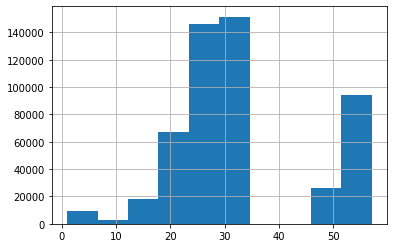

In [15]:
df.cohort_id.hist()

In [16]:
def compute_entropy(series):
    counts = series.value_counts()
    if len(counts)==1:
        ent = 0
    else:
        value, counts = np.unique(series, return_counts=True)
        ent = entropy(counts, base=None)
    return ent

In [18]:
compute_entropy(df.user)

5.992054273227725

In [19]:
compute_entropy(df.cohort_id)

3.625746934483461

In [20]:
compute_entropy(df.ip)

3.275083169753745